In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
plt.rcParams['figure.figsize'] = (12,8)
import plotly.express as px

In [ ]:
data_labels = pd.read_csv('/content/drive/MyDrive/Projet_s1/training_set_labels.csv')
data_labels

In [ ]:
data_features = pd.read_csv('/content/drive/MyDrive/Projet_s1/training_set_features.csv')
data_features

In [ ]:
data_features.shape

# Analyse exploratoire et  visualisation

In [ ]:
data_features.info()
# je constate que beaucoup de variable qualitative son au mauvais format
# Donc il va valoir les traiter en les rendant dans un format adequat

In [ ]:
data_features.isna().sum().sort_values(ascending = False)

In [ ]:
# race, respondent_id , education
merge_data = pd.merge(data_features, data_labels, on ='respondent_id')
merge_data.head()
data = merge_data
data

In [ ]:
#df = data.copy()

# **Analyse** **exploratoire et visualisation de données**

In [ ]:
data_features.info()

In [ ]:
data_features.dtypes.value_counts()

float64    23
object     12
int64       1
dtype: int64

In [ ]:
data_features.dtypes.value_counts()

float64    23
object     12
int64       1
dtype: int64

In [ ]:
data_features = data_features.astype(object)

In [ ]:
data_features.info()

In [ ]:
data_features['household_adults'] = data_features['household_adults'].astype('float')

In [ ]:
data_features['household_children'] = data_features['household_children'].astype('float')

In [ ]:
data_features.drop('employment_industry', axis=1, inplace=True)

In [ ]:
data_features.drop('employment_occupation', axis=1, inplace=True)

In [ ]:
data_features.shape

(26707, 34)

In [ ]:
#Je convertis les variables seasonal_vaccine et h1n1_vaccine de int64 à Object 
#data['seasonal_vaccine'] = data['seasonal_vaccine'].astype('O')
#data['h1n1_vaccine'] = data['h1n1_vaccine'].astype('O')

In [ ]:
#from plotly.offline import iplot
#data_features = ff.create_table(data.describe(include='O').T,index = True, index_title='Variables categorielles')
#iplot(data_features)

In [ ]:
data_features['hhs_geo_region'].unique()

In [ ]:
#data_int = ff.create_table(data.describe(include='float').T,index = True, index_title='Variables quantitatives')
#iplot(data_int)

In [ ]:
data_features

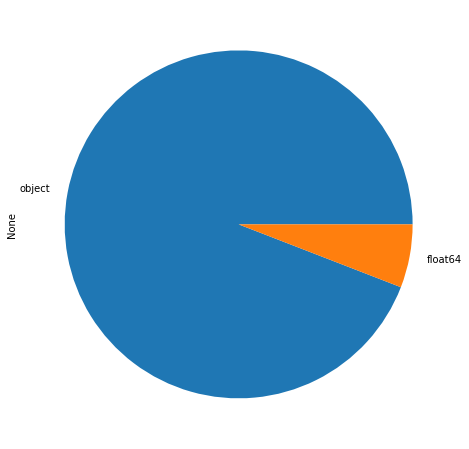

In [ ]:
data_features.dtypes.value_counts().plot.pie()

In [ ]:
#plt.figure(figsize=(20,10))
#sns.heatmap(data.isna(), cbar=False)

In [ ]:
data_features.info()

In [ ]:
data_features.isna().sum().sort_values(ascending = False)

In [ ]:
(data_features.isna().sum()/data_features.shape[0]).sort_values(ascending = False)

# Pour toutes les variables binaires :  Non = 0 et  Oui = 1


In [ ]:
total_rows = df.shape[0]
unique_athletes = len(df.Name.unique())
medal_winners = len(df[df.Medal.fillna('None')!='None'].Name.unique())
"{0} {1} {2}".format(total_rows, unique_athletes, medal_winners)
#'271116 134732 28202'

In [ ]:
selected_vaccin ='health_insurance'
selected_features = [selected_vaccin, 'sex']
sns.displot(data_features = data_features[selected_features], x = selected_vaccin, hue='sex', kind = 'kde')

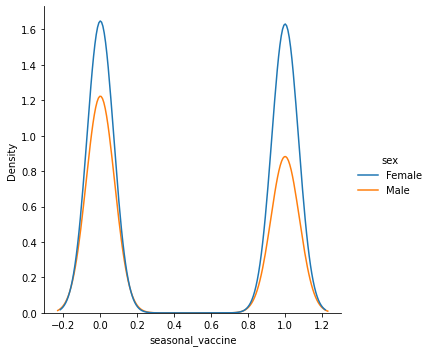

In [ ]:
selected_vaccin ='seasonal_vaccine'
selected_features = [selected_vaccin, 'sex']
sns.displot(data = data[selected_features], x = selected_vaccin, hue='sex', kind = 'kde')
# Pour voir la distribution des valeus en fonction du sex

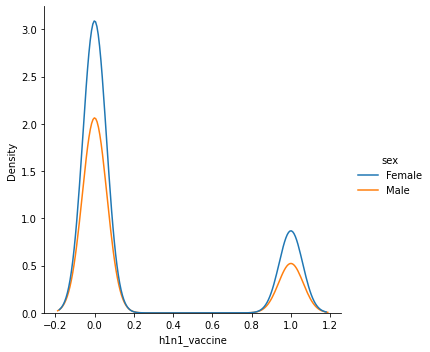

In [ ]:
selected_vaccin = 'h1n1_vaccine'
selected_features = [selected_vaccin, 'sex']
sns.displot(data = data[selected_features], x = selected_vaccin, hue='sex', kind = 'kde')

In [ ]:
selected_vaccin = 'h1n1_vaccine'
selected_features = [selected_vaccin, 'doctor_recc_h1n1']
sns.displot(data_features = data_features[selected_features], x = selected_vaccin, hue='doctor_recc_h1n1', kind = 'kde')

In [ ]:
data_features.shape


(26707, 34)

In [ ]:
selected_vaccin = 'seasonal_vaccine'
selected_features = [selected_vaccin, 'chronic_med_condition']
sns.displot(data_labels = data_labels[selected_features], x = selected_vaccin, hue='chronic_med_condition', kind = 'kde')
# ce graphe montre la distribution de de la variable seaisonal_vaccine en fontion de chronic_med_condition

NameError: ignored

In [ ]:
data_labels['h1n1_vaccine'].value_counts(normalize = True)
# constacte qu'il y a un désequilibre considerable de classe environ 79% de NON et seulement  21% de OUI
# Pour le labels h1n1_vaccine

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [ ]:
data_labels['seasonal_vaccine'].value_counts(normalize = True)
# constacte que le désequilibre de classe n'est trop mais existe 14272 NON et seulement 12435 de OUI 
#pour le labels 

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

On constacte qu'il y a un désequilibre considerable de classe environ 79% de NON c'est-à-dire 79% de personne n'ont pas reçu le vaccin h1n1_vaccine
et seulement  21% de OUI  donc 21% de individus ont reçu le vaccin h1n1_vaccine.


Quant à la variable seasonal_vaccine le désequilibre de classe n'est trop mais existe 53% de NON, 53% des individus n'ont pas reçu le vaccin  seasonal_vaccine NON et seulement environ 47% l'ont reçu 



In [ ]:
#for col in data.select_dtypes('O'):
# print(f'{col :-<60} {data[col].unique()}')

# Histogramme des variables continues

In [ ]:
for col in data_features.select_dtypes('object'):
  print(col)
  plt.figure()
  sns.distplot(data_features[col])

In [ ]:
import plotly.express as px
fig=px.histogram(data, x= data['employment_industry'])
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(title='madalité de la variable employment_industry', xaxis_title='employment_industry')
fig.show()

In [ ]:
import plotly.express as px
fig=px.histogram(data_features, x= data_features['age_group'])
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(title='madalité de la variable age_group', xaxis_title='age_group')
fig.show()

In [ ]:
for col in data.select_dtypes('O'):
  print(col)

age_group
education
race
sex
income_poverty
marital_status
rent_or_own
employment_status
hhs_geo_region
census_msa
employment_industry
employment_occupation


In [ ]:
import plotly.express as px
for col in data.select_dtypes('O'):
  fig=px.histogram(data_features, x=col)
                                 
  fig.update_xaxes(categoryorder='total descending')
  fig.update_layout(title='modalité des variables categorielles')
  fig.show()
  


In [ ]:
for col in data_features.select_dtypes('float'): 
  print(col)

In [ ]:
data['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

# Recherche de relation entre les variables sibles et les variables explicatives

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [ ]:
data['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [ ]:
df_accepte_h1 = data[data['h1n1_vaccine'] == 1]
df_accepte_h1


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,2.0,5.0,4.0,4.0,45 - 54 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny,1,1
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,4.0,2.0,1.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1,1
16,16,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,2.0,1.0,4.0,4.0,1.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,NaN,Not in Labor Force,oxchjgsf,"MSA, Principle City",0.0,0.0,NaN,NaN,1,1
26,26,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,2.0,4.0,5.0,5.0,4.0,45 - 54 Years,College Graduate,White,Female,NaN,Married,NaN,Employed,mlyzmhmf,"MSA, Principle City",1.0,2.0,ldnlellj,hfxkjkmi,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26678,26678,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,4.0,4.0,2.0,5.0,2.0,1.0,55 - 64 Years,Some College,White,Female,"> $75,000",Married,Own,Employed,atmpeygn,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,1,1
26683,26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0,55 - 64 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,1,1
26685,26685,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,4.0,1.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City",0.0,0.0,NaN,NaN,1,1
26688,26688,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,5.0,4.0,5.0,5.0,4.0,45 - 54 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,1,1


In [ ]:
df_refus_h1 = data[data['h1n1_vaccine'] == 0]
df_refus_h1

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [ ]:
data['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [ ]:
df_accepte_S = data[data['seasonal_vaccine'] == 1]
df_accepte_S


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,2.0,5.0,4.0,4.0,45 - 54 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny,1,1
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,4.0,2.0,1.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26694,26694,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,wxleyezf,emcorrxb,0,1
26696,26696,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,4.0,4.0,5.0,5.0,4.0,45 - 54 Years,Some College,White,Male,NaN,Married,Own,Employed,bhuqouqj,"MSA, Principle City",1.0,0.0,saaquncn,mxkfnird,1,1
26698,26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,4.0,4.0,2.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,atmpeygn,"MSA, Not Principle City",1.0,1.0,dotnnunm,mxkfnird,0,1
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,5.0,5.0,4.0,5.0,55 - 64 Years,12 Years,White,Female,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City",1.0,0.0,NaN,NaN,0,1


In [ ]:
df_refus_S = data[data['seasonal_vaccine'] == 0]
df_refus_S

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,4.0,4.0,2.0,4.0,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,NaN,NaN,0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [ ]:
for col in data: 
  plt.figure()
  sns.displot(df_accepte_h1[col], label = 'oui_h1n1')
  sns.displot(df_refus_h1[col], label = 'non_h1n1')
  plt.legend()


In [ ]:
#df_vaccin = data[data['seasonal_vaccine'] == 1  ['h1n1_vaccine'] == 1] 

In [ ]:
for col in data:
  sns.displot(df_accepte_h1[col], label = 'ont fait le vaccin h1n1')
  sns.displot(df_refus_h1[col], label = 'ont refusé le vaccin h1n1')
  plt.legend()

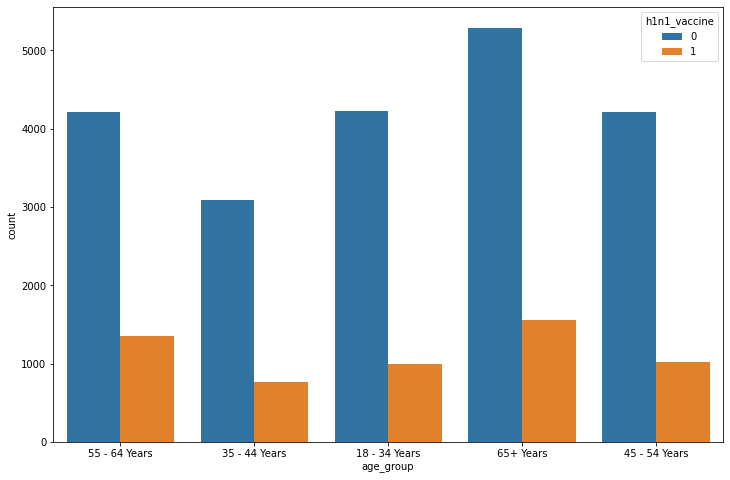

In [ ]:
sns.countplot(x='age_group', hue='h1n1_vaccine', data=data)

D'après cette analyse on constate que les individus qui  ont plus fait le le vaccin contre la grippe h1n1 sont ceux qui ont 65 et plus suivi de ceux qui leur comprit entre 55 et 64. Les les individus qui ont entre 18 et 34 ans et 45 et 54 ans ont a peu près les mêmes taux de vaccination. Les individus les moin vaccinés ceux ont leur âge entre 35 et 44 ans.

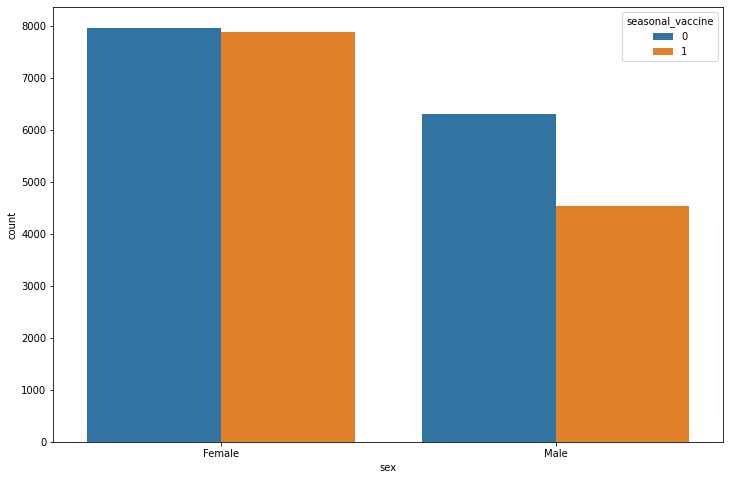

In [ ]:
sns.countplot(x='sex', hue='seasonal_vaccine', data=data)

On constate qu'il y a presque le même nombre de femmes qui fait le vaccin contre la grippe h1n1 et celle qui l'on pas fait alorsque environ 75% des individus de sex masculin ont fait le vaccin

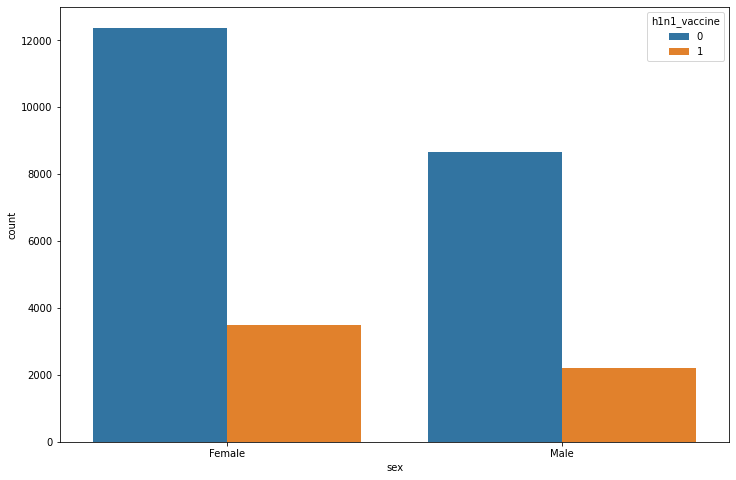

In [ ]:
sns.countplot(x='sex', hue='h1n1_vaccine', data=data)

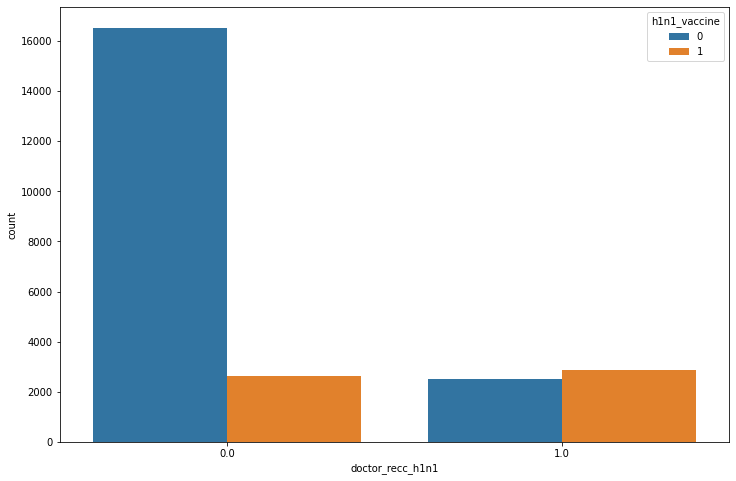

In [ ]:
sns.countplot(x='doctor_recc_h1n1', hue='h1n1_vaccine', data=data)

In [ ]:
pd.crosstab(data['h1n1_vaccine'], data['seasonal_vaccine'], normalize=True)
# dans cette visualisation on peut dire que environ 50% des individus qui ont refusé
# le vaccin h1n1 on également refusé le vaccin contre la grippe saisonnière 
# environ 29% des individus qui ont refusé le vaccin contre la gripê A h1n1_vaccin 
# ont fait le vaccin contre la grippe saisonnière seasonal_vaccine
#seulement 3.6% ont refusé le vaccin contre la grippe saisonnière seasonal_vaccine
# et ont fait le vaccin contre la gripê A h1n1_vaccin en fin 17.5% des individus ont 
# fait à la fois les deux vaccins

seasonal_vaccine,0,1
h1n1_vaccine,,
0,0.497810,0.289737
1,0.036582,0.175871


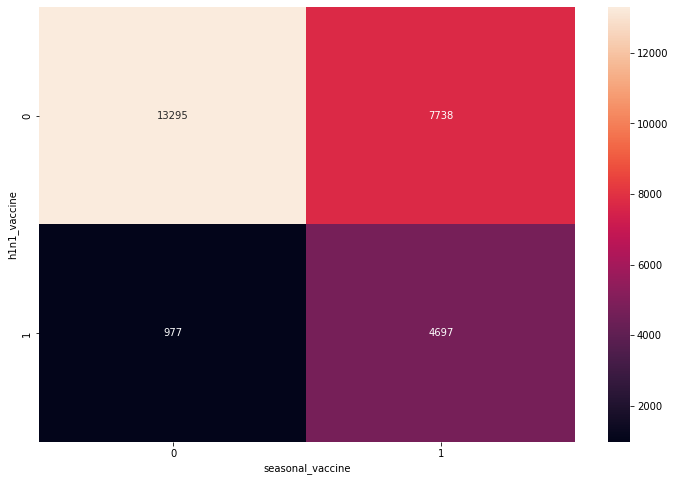

In [ ]:
plt.figure()
sns.heatmap(pd.crosstab(data['h1n1_vaccine'], data['seasonal_vaccine']), annot = True, fmt='d')

# Statistiques descriptives

In [ ]:
#data_num = data.select_dtypes('float')

# Pro-processing

In [ ]:
df = data.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [ ]:
px.scatter(df, x = 'h1n1_vaccine', y = 'doctor_recc_h1n1')

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending =False )

In [ ]:
df.isna().sum()/df.shape[0]

In [ ]:
val_num = df.isna().sum().sort_values(ascending = False)
val_num = pd.DataFrame(val_num)

In [ ]:
val_num = df.isna().sum().sort_values(ascending = False)
val_num = pd.DataFrame(val_num)
val_num.rename(columns={0:'nb_de_nan'}, inplace = True)
val_num['%_nan'] = round(val_num['nb_de_nan'])
val_num[val_num['%_nan']>0]

,nb_de_nan,%_nan
employment_occupation,13470,13470
employment_industry,13330,13330
health_insurance,12274,12274
income_poverty,4423,4423
doctor_recc_h1n1,2160,2160
doctor_recc_seasonal,2160,2160
rent_or_own,2042,2042
employment_status,1463,1463
marital_status,1408,1408
education,1407,1407


In [ ]:
data.corr()['h1n1_vaccine']

respondent_id                 -0.003280
h1n1_concern                   0.121929
h1n1_knowledge                 0.117951
behavioral_antiviral_meds      0.040608
behavioral_avoidance           0.047690
behavioral_face_mask           0.070498
behavioral_wash_hands          0.074712
behavioral_large_gatherings    0.017822
behavioral_outside_home        0.021768
behavioral_touch_face          0.071648
doctor_recc_h1n1               0.393890
doctor_recc_seasonal           0.209864
chronic_med_condition          0.095207
child_under_6_months           0.066962
health_worker                  0.169768
health_insurance               0.121170
opinion_h1n1_vacc_effective    0.269347
opinion_h1n1_risk              0.323265
opinion_h1n1_sick_from_vacc    0.075091
opinion_seas_vacc_effective    0.179272
opinion_seas_risk              0.258571
opinion_seas_sick_from_vacc    0.008360
household_adults               0.007545
household_children            -0.003320
h1n1_vaccine                   1.000000
